# Importação e instalação das bibliotecas

In [39]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

# Carregamento da base de dados

## Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

In [42]:
df_treinamento = pd.read_csv('Train50.csv', sep=';')

In [43]:
df_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [44]:
df_treinamento.shape

(50000, 5)

In [45]:
df_treinamento.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
40713,1046954555336994816,"eu detesto tanto ter cólica, e poxa vida, fiqu...",Tue Oct 02 02:46:32 +0000 2018,0,:(
21597,1046762589198458881,Acho sexy gente com uma bela playlist de funk :),Mon Oct 01 14:03:43 +0000 2018,1,:)
34083,1049151108793470977,soqria ta dormino c o menino q eu gosto :((,Mon Oct 08 04:14:51 +0000 2018,0,:(
47007,1046798865133912064,meu deus alguém me empresta login no netflix k...,Mon Oct 01 16:27:52 +0000 2018,0,:(
15847,1047460237404528640,@JubsAmbrocci passa ai o link :),Wed Oct 03 12:15:56 +0000 2018,1,:)


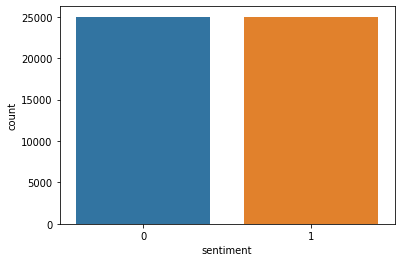

In [48]:
#Total de sentimentos negativos e positivos
sns.countplot(df_treinamento['sentiment'], label = 'Contagem');

In [49]:
#Apagando as colunas que não serão usadas no modelo
df_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [50]:
df_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [57]:
#Verificando se a base tem valor nulo
df_treinamento.isnull().sum()

tweet_text    0
sentiment     0
dtype: int64

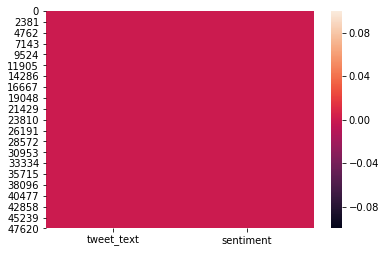

In [58]:
#Outra maneira de verificar os valores nulos
sns.heatmap(pd.isnull(df_treinamento));

# Carregando a base de teste

In [51]:
df_teste = pd.read_csv('Test.csv', sep=";")

In [52]:
df_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [53]:
df_teste.shape

(5000, 5)

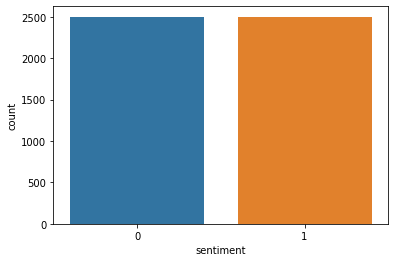

In [54]:
sns.countplot(df_teste['sentiment'], label='Contagem');

In [55]:
#Apagando as colunas que não serão usadas no modelo
df_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [56]:
df_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


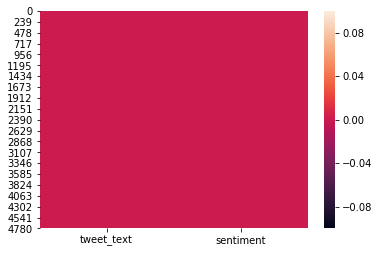

In [59]:
sns.heatmap(pd.isnull(df_teste));

# Pré processamento dos textos

In [60]:
pln = spacy.load('pt')
pln

In [61]:
df_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [62]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [63]:
print(stop_words)

{'vindo', 'elas', 'nesta', 'cujo', 'tua', 'quer', 'maior', 'põem', 'iniciar', 'teve', 'inicio', 'boa', 'sua', 'quarta', 'essa', 'quinto', 'grupo', 'ela', 'vários', 'ser', 'mesmo', 'deve', 'quieto', 'com', 'muito', 'sem', 'oitava', 'vossas', 'aí', 'geral', 'primeiro', 'oitavo', 'área', 'estás', 'então', 'está', 'um', 'corrente', 'tens', 'as', 'fora', 'nos', 'algo', 'vez', 'maioria', 'local', 'algumas', 'nenhuma', 'estão', 'aquelas', 'podem', 'seria', 'tente', 'para', 'daquela', 'pontos', 'teus', 'contra', 'enquanto', 'se', 'este', 'esse', 'inclusive', 'poder', 'próxima', 'minha', 'quarto', 'oito', 'todas', 'menor', 'umas', 'tem', 'das', 'depois', 'quinta', 'sabe', 'vinte', 'apenas', 'saber', 'toda', 'teu', 'direita', 'dão', 'meio', 'porquanto', 'ainda', 'comprida', 'porquê', 'fim', 'vezes', 'duas', 'mas', 'segundo', 'através', 'põe', 'sete', 'onde', 'tivestes', 'são', 'de', 'sexta', 'usar', 'pelas', 'onze', 'certeza', 'dar', 'dez', 'naquela', 'primeira', 'outras', 'vosso', 'mês', 'parti

In [64]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
def preprocessamento(texto):
  # Letras minúsculas
  texto = texto.lower()

  # Nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  
  # Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
  return lista

# Pré processamento da base de dados

In [67]:
df_treinamento['tweet_text'] = df_treinamento['tweet_text'].apply(preprocessamento)

In [68]:
df_treinamento.head(10)

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1
5,amigo to emocaopositiva,1
6,bravo jairo emocaopositiva,1
7,socorrer ksoaksosks achar to o caixa som :p,1
8,gostar fazenda emocaopositiva morrer medo ga...,1
9,amanhar venom emocaopositiva,1


In [69]:
df_teste['tweet_text'] = df_teste['tweet_text'].apply(preprocessamento)

In [70]:
df_teste.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo e abraço hahahahaha bue f...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


# Tratamento da classe

In [71]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [73]:
base_dados_treinamento_final = []
for texto, emocao in zip(df_treinamento['tweet_text'], df_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [74]:
len(base_dados_treinamento_final)

50000

In [76]:
base_dados_treinamento_final[10:20]

[['simplesmente o deixar chatear querer muitooo e iludir emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['o comedir umar rotina e perfeitamente parir consolidar o escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajar bacano aleijar esperar e o silvar feliz emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tou o video cabra bebé emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  verificar o ocorrer dan vir conversar comigo o dm pra gente conversar melhor blz emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  chamar emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}],
 ['  nariz ... olhar ouvir ... precisar umar centopeia pra votar útil o pt :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  o capítulo escrever gordo cabelar vermelhar feminista peludo político obeso e o revisor carril :-)))',
  {'POSITIVO': True,

In [77]:
base_dados_treinamento_final[48000:480015]

[['  amigo o intuito eh tinto real emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  querer falar emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['n entender pq outubro falto água emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['semana começar dnv emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['  im emo omg emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['ano emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['tô triste emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['odiar o começar pelar almoçar ru o aula estágio emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  iriar main suportar emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  ai migar vir feliz pensar o rir emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['alguém user pra mim emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['querer o ze neto emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['

# Criação do classificador

In [78]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [79]:
modelo.begin_training()
for epoca in range(20):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.1375774495350766e-05}
{'textcat': 2.5232237420313476e-07}
{'textcat': 1.9368982692659527e-07}
{'textcat': 3.9238444343248427e-07}


In [80]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [81]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.13757745e-05, 1.13757745e-05, 1.13757745e-05, ...,
       1.78178484e-07, 1.78178484e-07, 1.78178484e-07])

Text(0, 0.5, 'Erro')

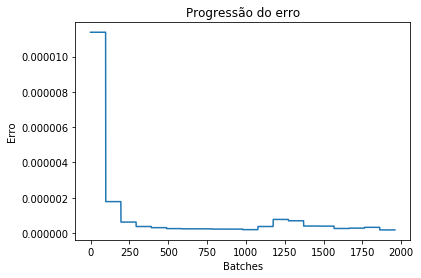

In [82]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [83]:
modelo.to_disk("modelo")

# Testes com uma frase

In [84]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

## Texto Positivo

In [85]:
texto_positivo = df_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [86]:
previsao = modelo_carregado(texto_positivo)
previsao

  ficar feliz q recíproco emocaopositiva

In [87]:
previsao.cats

{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05}

In [88]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [89]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.944631814956665, 'NEGATIVO': 0.04678107053041458}

## Texto Negativo

In [91]:
df_teste['tweet_text'][4000]

'tô triste filmar mulan o mushu emocaonegativa'

In [92]:
texto_negativo = df_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 4.539787187241018e-05, 'NEGATIVO': 0.9999545812606812}

# Avaliação do modelo

## Avaliação na base de treinamento

In [94]:
previsoes = []
for texto in df_treinamento['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [95]:
previsoes

[{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 7.287893822649494e-05},
 {'POSITIVO': 0.9998940229415894, 'NEGATIVO': 0.00014470706810243428},
 {'POSITIVO': 0.9999525547027588, 'NEGATIVO': 0.0001732962700771168},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999068975448608, 'NEGATIVO': 0.000172134255990386},
 {'POSITIVO': 0.9997456669807434, 'NEGATIVO': 0.0005649810773320496},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999511241912842, 'NEGATIVO': 0.00010908367403317243},
 {'POSITIVO': 0.999921441078186, 'NEGATIVO': 0.00010953197488561273},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9998812675476074, 'NEGATIVO': 0.00034335351665504277},
 {'POSITIVO': 0.99

In [96]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [97]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [99]:
respostas_reais = df_treinamento['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9998

In [101]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[24990,    10],
       [    0, 25000]], dtype=int64)

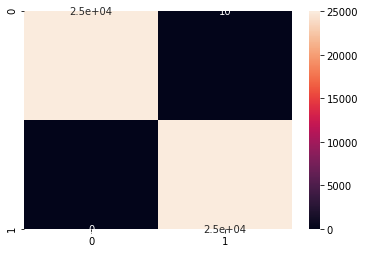

In [102]:
sns.heatmap(cm, annot=True)

## Avaliação na base de teste

In [103]:
previsoes = []
for texto in df_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [104]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [105]:
respostas_reais = df_teste['sentiment'].values

In [106]:
accuracy_score(respostas_reais, previsoes_final)

0.998

In [107]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2493,    7],
       [   3, 2497]], dtype=int64)

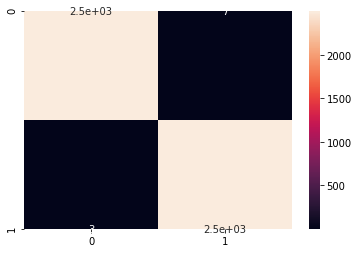

In [108]:
sns.heatmap(cm, annot=True)